In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "/Users/danielbrand/Documents/Uni/Master/2. Semester/Artificial Intelligence & Robotics/Final Project/telco_final.csv"
data = pd.read_csv(data_path)

In [3]:
X = data.drop(["churn", "has_online_backup_No"], axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
estimator = RandomForestClassifier()
rfecv = RFECV(estimator, step=1, cv=5)
rfecv.fit(X,y)

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [7]:
print('Optimal number of features : %d' % rfecv.n_features_)
print('Best features :\n', X.columns[rfecv.support_])
print('Importance of selected features :\n', np.absolute(rfecv.estimator_.feature_importances_))

Optimal number of features : 36
Best features :
 Index(['is_male', 'is_senior_citizen', 'has_partner', 'has_dependents',
       'tenure', 'has_phone_service', 'has_paperless_billing',
       'monthly_charges', 'total_charges', 'has_multiple_lines_No',
       'has_multiple_lines_No phone service', 'has_multiple_lines_Yes',
       'has_internet_service_DSL', 'has_internet_service_Fiber optic',
       'has_internet_service_No', 'has_online_security_No',
       'has_online_security_Yes', 'has_online_backup_No internet service',
       'has_online_backup_Yes', 'has_device_protection_No',
       'has_device_protection_Yes', 'has_tech_support_No',
       'has_tech_support_No internet service', 'has_tech_support_Yes',
       'has_streaming_TV_No', 'has_streaming_TV_Yes',
       'has_streaming_movies_No', 'has_streaming_movies_No internet service',
       'has_streaming_movies_Yes', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year',
       'payment_method_Bank transfer 

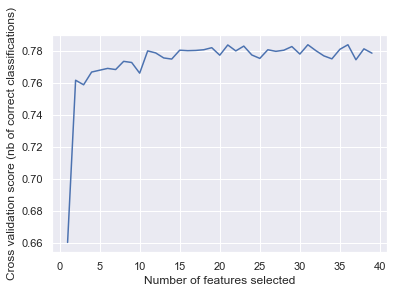

In [10]:
sns.set()
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()